In [1]:
# Analiza danych pozyskanych w formie odpowiedzi na akietę kierowaną do Starostów i Starościn kierunków na Wydziale Humanistycznym Akademii Górniczo-Hutniczej im. Stanisława Staszica w Krakowie
# Krzysztof Tomasz Stawarz, WRSS WH AGH
# Kraków, 28.10.2024

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import textwrap

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
df = pd.read_excel("dane.xlsx", usecols=range(1,7))
df["Jestem:"].replace({
    "doświadczony/doświadczona na stanowisku Starosty/Starościny": "doświadczony",
    "nowym/nową Starostą/Starościną": "nowy"
    }, inplace=True)
df.columns = ["Jestem:"] + [column.replace("Oceń poniższe zdania: [", "") for column in df.columns[1:]]
df.columns = ["Jestem:"] + [column.replace("]", "") for column in df.columns[1:]]
df.columns = ["Jestem:"] + [column.replace("\n", "") for column in df.columns[1:]]
df.head()

,Jestem:,Jak oceniasz swoje zadowolenie z pełnienia roli starościny/starosty?,Jak oceniasz poziom docenienia Twojej pracy jako starościny/starosty przez innych studentów?,"Jak oceniasz swoją wiedzę na temat zasad funkcjonowania uczelni, niezbędną do pełnienia funkcji starościny/starosty?",Jak oceniasz swoje umiejętności rozwiązywania problemów studentów?,"Jak oceniasz wsparcie, które otrzymujesz od samorządu wydziałowego w pełnieniu swojej funkcji?"
0,doświadczony,Źle,Umiarkowanie,Umiarkowanie,Bardzo dobrze,Bardzo dobrze
1,doświadczony,Umiarkowanie,Umiarkowanie,Dobrze,Dobrze,Bardzo dobrze
2,nowy,Dobrze,Umiarkowanie,Dobrze,Dobrze,Dobrze
3,doświadczony,Umiarkowanie,Bardzo źle,Dobrze,Bardzo dobrze,Dobrze
4,doświadczony,Umiarkowanie,Umiarkowanie,Dobrze,Dobrze,Dobrze


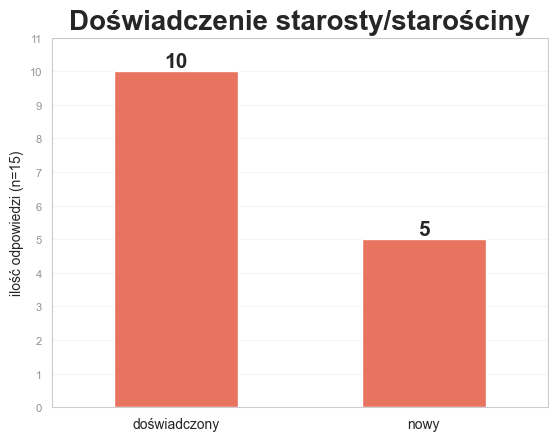

In [3]:
jestem = df["Jestem:"].value_counts()
ax = sns.barplot(jestem, width=.5, color="tomato")
plt.title("Doświadczenie starosty/starościny", size=20, weight="bold")
plt.xlabel(None)
plt.yticks(range(0, 12), size=8, alpha=.5)
plt.grid(axis="y", alpha=.2)
plt.ylabel(f"ilość odpowiedzi (n={df.shape[0]})")
for i in ax.containers:
    ax.bar_label(i, weight="bold", size=15)
plt.show()

In [4]:
mapper = {
    "Bardzo źle": 0,
    "Źle": 1,
    "Umiarkowanie": 2,
    "Dobrze": 3,
    "Bardzo dobrze": 4
} # skala 0-4

df_num = df.replace({column: mapper for column in df.columns[1:]})
df_num.head()

,Jestem:,Jak oceniasz swoje zadowolenie z pełnienia roli starościny/starosty?,Jak oceniasz poziom docenienia Twojej pracy jako starościny/starosty przez innych studentów?,"Jak oceniasz swoją wiedzę na temat zasad funkcjonowania uczelni, niezbędną do pełnienia funkcji starościny/starosty?",Jak oceniasz swoje umiejętności rozwiązywania problemów studentów?,"Jak oceniasz wsparcie, które otrzymujesz od samorządu wydziałowego w pełnieniu swojej funkcji?"
0,doświadczony,1,2,2,4,4
1,doświadczony,2,2,3,3,4
2,nowy,3,2,3,3,3
3,doświadczony,2,0,3,4,3
4,doświadczony,2,2,3,3,3


In [5]:
likert = df_num.iloc[:, 1:]
likert.mean().round(2)  # średnia dla kazdego pytania w skali 0-4

Jak oceniasz swoje zadowolenie z pełnienia roli starościny/starosty?                                                    2.67
Jak oceniasz poziom docenienia Twojej pracy jako starościny/starosty przez innych studentów?                            2.33
Jak oceniasz swoją wiedzę na temat zasad funkcjonowania uczelni, niezbędną do pełnienia funkcji starościny/starosty?    2.53
Jak oceniasz swoje umiejętności rozwiązywania problemów studentów?                                                      3.13
Jak oceniasz wsparcie, które otrzymujesz od samorządu wydziałowego w pełnieniu swojej funkcji?                          3.20
dtype: float64

In [6]:
likert.describe().T

,count,mean,std,min,25%,50%,75%,max
Jak oceniasz swoje zadowolenie z pełnienia roli starościny/starosty?,15.0,2.666667,1.046536,1.0,2.0,3.0,3.5,4.0
Jak oceniasz poziom docenienia Twojej pracy jako starościny/starosty przez innych studentów?,15.0,2.333333,1.046536,0.0,2.0,2.0,3.0,4.0
"Jak oceniasz swoją wiedzę na temat zasad funkcjonowania uczelni, niezbędną do pełnienia funkcji starościny/starosty?",15.0,2.533333,0.833809,1.0,2.0,3.0,3.0,4.0
Jak oceniasz swoje umiejętności rozwiązywania problemów studentów?,15.0,3.133333,0.743223,2.0,3.0,3.0,4.0,4.0
"Jak oceniasz wsparcie, które otrzymujesz od samorządu wydziałowego w pełnieniu swojej funkcji?",15.0,3.200000,0.861892,1.0,3.0,3.0,4.0,4.0


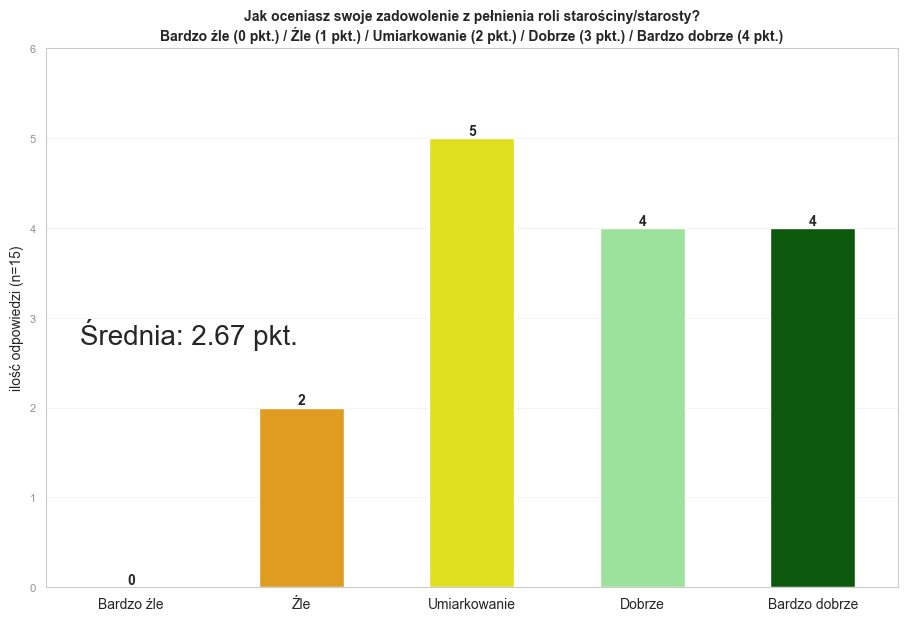

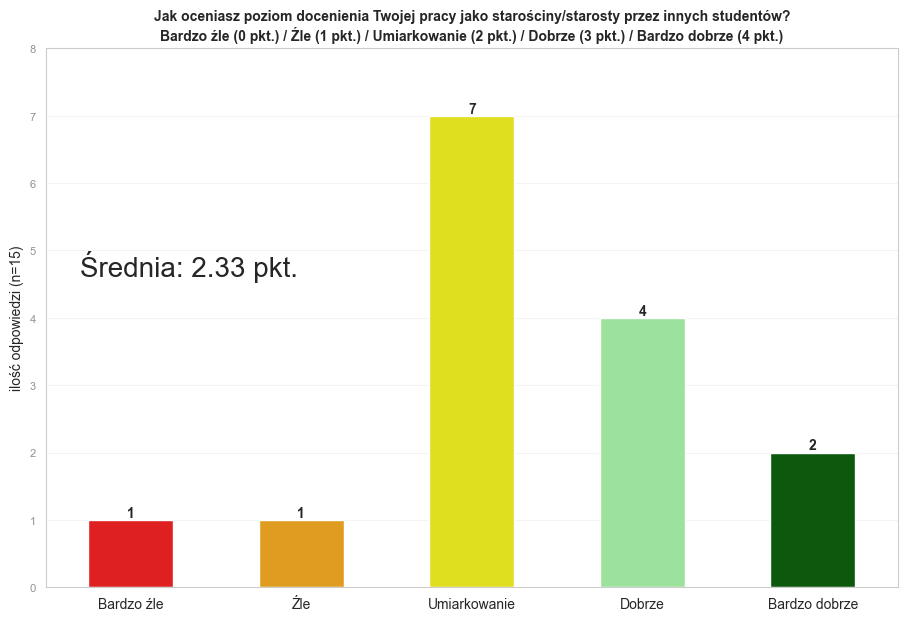

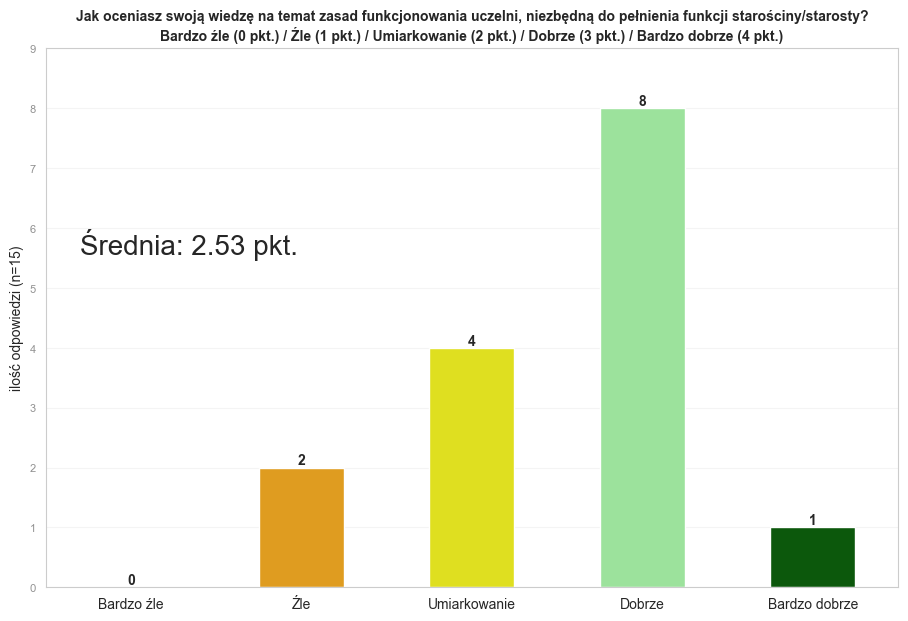

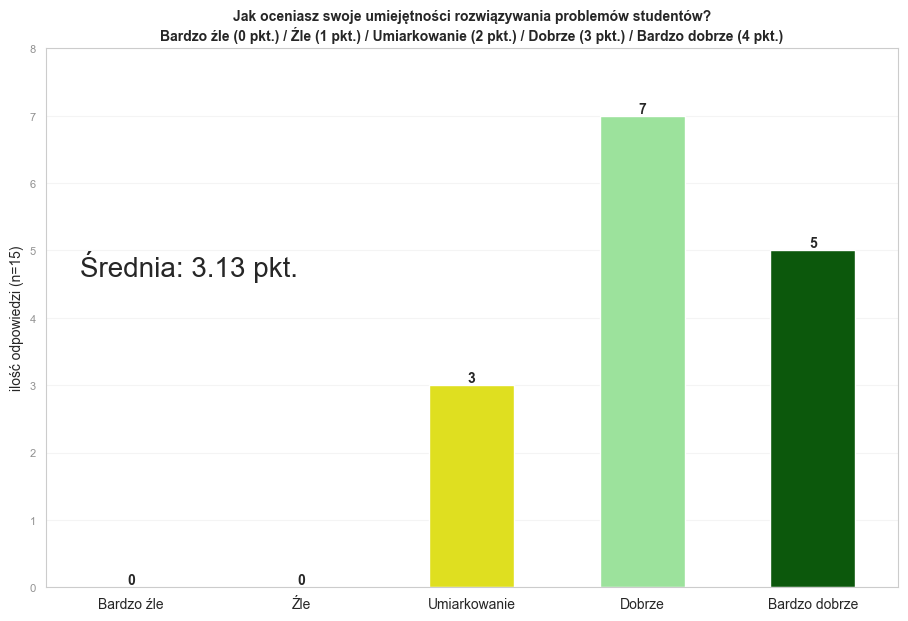

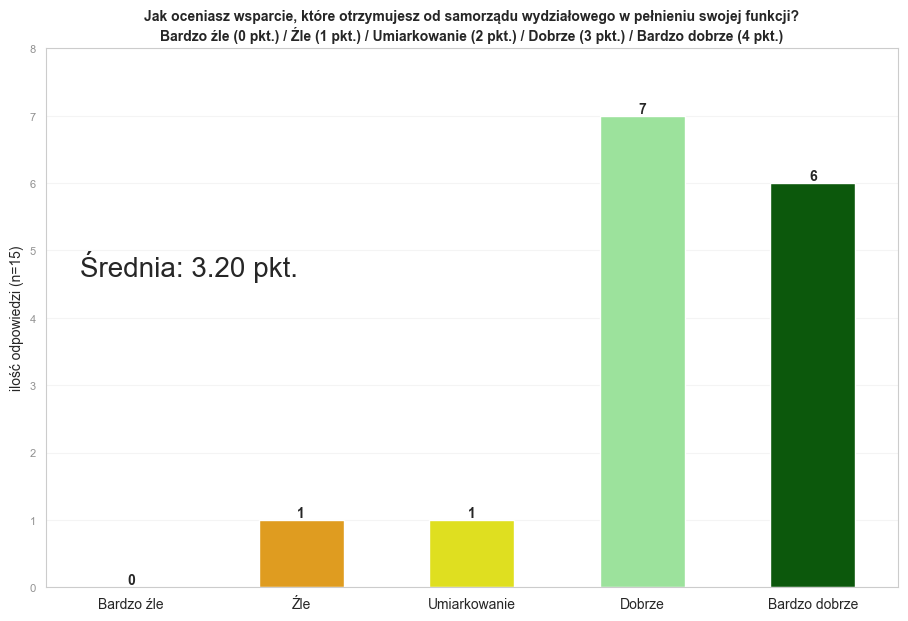

In [7]:
for i in range(5):
    plt.figure(figsize=(11, 7))
    data = likert.iloc[:, i].value_counts().reindex(range(0, 5), fill_value=0)
    ax = sns.barplot(data, width=0.5, palette=["red", "orange", "yellow", "lightgreen", "darkgreen"])
    
    plt.title(likert.columns[i] + "\n" + "Bardzo źle (0 pkt.) / Źle (1 pkt.) / Umiarkowanie (2 pkt.) / Dobrze (3 pkt.) / Bardzo dobrze (4 pkt.)", size=10, weight="bold")
    plt.xlabel(None)
    plt.yticks(range(0, max(data.values) + 2), size=8, alpha=0.5)
    plt.grid(axis="y", alpha=0.2)
    ax.set_xticklabels(list(mapper.keys()))
    plt.ylabel(f"ilość odpowiedzi (n={df.shape[0]})")
    
    for container in ax.containers:
        ax.bar_label(container, weight="bold", size=10)

    mean_val = likert.describe().loc["mean", likert.columns[i]]
    plt.text(
        x=-0.3, y=max(data.values) -2,
        s=f"Średnia: {mean_val:.2f} pkt.",
        ha="left", va="top", size=20, alpha=1,
    )

    plt.show()


In [8]:
temp = df_num.groupby("Jestem:").mean().reset_index()  # paired dotplot nizej
temp

,Jestem:,Jak oceniasz swoje zadowolenie z pełnienia roli starościny/starosty?,Jak oceniasz poziom docenienia Twojej pracy jako starościny/starosty przez innych studentów?,"Jak oceniasz swoją wiedzę na temat zasad funkcjonowania uczelni, niezbędną do pełnienia funkcji starościny/starosty?",Jak oceniasz swoje umiejętności rozwiązywania problemów studentów?,"Jak oceniasz wsparcie, które otrzymujesz od samorządu wydziałowego w pełnieniu swojej funkcji?"
0,doświadczony,2.5,2.2,2.6,3.3,3.5
1,nowy,3.0,2.6,2.4,2.8,2.6


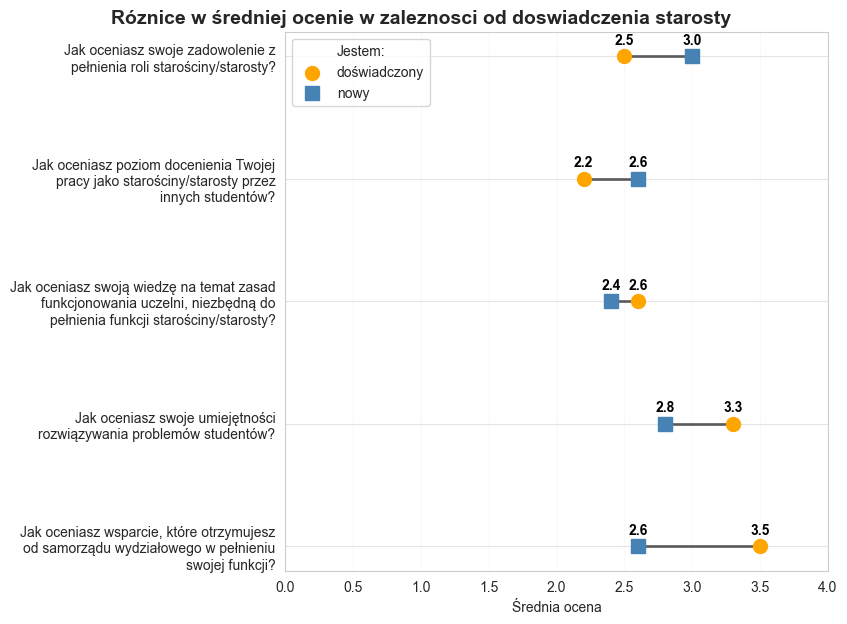

In [9]:
temp = df_num.groupby("Jestem:").mean().reset_index()  # paired dotplot nizej
temp2 = pd.concat([temp.iloc[:, 0], temp.iloc[:,:0:-1]], axis=1)
data = temp2.melt(id_vars="Jestem:", var_name= "Pytanie", value_name= "Średnia")

questions = data['Pytanie'].unique()
y_positions = {question: i for i, question in enumerate(questions)}

wrapped_labels = [textwrap.fill(label, width=40) for label in questions]

plt.figure(figsize=(7, 7))

colors = {'doświadczony': 'orange', 'nowy': 'steelblue'}
line_colors = ['purple', 'teal', 'gold', 'salmon', 'darkgreen']

for i, question in enumerate(questions):
    question_data = data[data['Pytanie'] == question]
    if len(question_data) == 2:
        x_values = question_data['Średnia'].values
        y_value = y_positions[question]
        plt.plot(x_values, [y_value, y_value], color="black", linewidth=2, alpha=0.6, zorder=1)

for _, row in data.iterrows():
    if row['Jestem:'] == 'doświadczony':
        plt.scatter(row['Średnia'], y_positions[row['Pytanie']], color=colors[row['Jestem:']], s=100, label=row['Jestem:'], marker='o')  # Circle
    else:
        plt.scatter(row['Średnia'], y_positions[row['Pytanie']], color=colors[row['Jestem:']], s=100, label=row['Jestem:'], marker='s')  # Square
        
    plt.text(row['Średnia'], y_positions[row['Pytanie']] + 0.075, f"{row['Średnia']:.1f}", 
             ha='center', va='bottom', fontsize=10, weight='bold', color='black')

plt.yticks(ticks=range(len(questions)), labels=wrapped_labels)
plt.xlim(0, 4)
plt.xlabel("Średnia ocena")
plt.ylabel("")
plt.yticks(ticks=range(len(questions)), labels=wrapped_labels)  # Use wrapped labels here

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Jestem:",)

plt.title("Róznice w średniej ocenie w zaleznosci od doswiadczenia starosty", fontsize=14, weight="bold", x=0.25)
plt.grid(axis="x", alpha=0.1)
plt.grid(axis="y", linestyle="-", alpha=0.5)

plt.show()


In [10]:
# EOF